# 1) На платформі Kaggle оберемо датасет з інформацією про осіб, у яких є борг і завантажимо його на комп'ютер

(датасет - https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)

In [3]:
# імпортуємо необхідні бібліотеки
import pandas as pd

In [45]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


# 2) Знайти математичне сподівання, медіану, моду, дисперсію, середньоквадратичне відхилення, пояснити їх зміст

Знайдемо математичне сподівання для суми боргу - середнє значення суми боргу у вибірці. 
Зробимо це вручну і методом бібліотеки statistics

In [14]:
sum(df['LoanAmount']) / len(df['LoanAmount'])

104.98687664041995

In [15]:
import statistics
statistics.mean(df['LoanAmount'])

104.98687664041995

Знайдемо медіану доходу - середнє значення при розташуванні значень в порядку сортування; Вручну та засобами бібліотеки.

In [23]:
sorted_incomes = sorted(df['ApplicantIncome'])
if len(sorted_incomes) % 2:
     median = sorted_incomes[len(sorted_incomes) // 2]
else:
     median =  (sorted_incomes[len(sorted_incomes) // 2 - 1] + sorted_incomes[len(sorted_incomes) // 2]) / 2
print(median)

3333


In [24]:
statistics.median(df['ApplicantIncome'])

3333

Знайдемо моду терміну погашення боргу - термін погашення, що зустрічається найчастіше. 

In [25]:
statistics.mode(df['Loan_Amount_Term'])

360.0

Знайдемо дисперсію, вона допомагає зрозуміти, наскільки дані є "розпорошеними" 

In [32]:
mean = statistics.mean(df['ApplicantIncome'])
variance = sum((df['ApplicantIncome'] - mean) ** 2) / len(df['ApplicantIncome'])
print(variance)

2010580.2778569998


In [33]:
variance = df['ApplicantIncome'].var()
print(variance)

2015871.2785882025


Знайдемо стандартне відхилення.

In [36]:
import math

math.sqrt(variance)

1419.8138182832997

In [37]:
df['ApplicantIncome'].std()

1419.8138182832997

# 3. Візуалізуємо дані за допомогою гістрограми

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

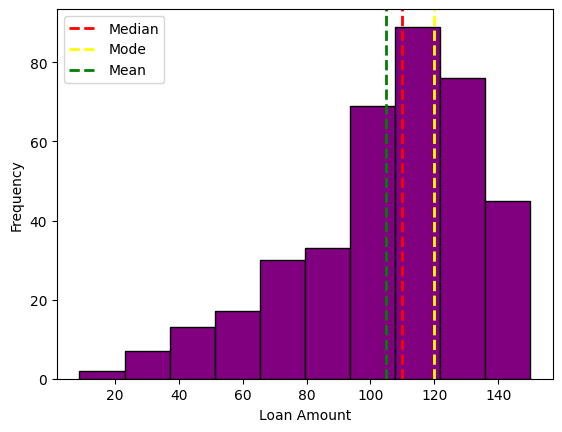

In [44]:
import matplotlib.pyplot as plt

plt.hist(df['LoanAmount'], color='purple', edgecolor='black')

mean = df['LoanAmount'].mean()
median = df['LoanAmount'].median()
mode = df['LoanAmount'].mode()[0]  

plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Mean')

plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.legend()
plt.show()


# 4. Виконуємо дії з пункту колекції Series та DataFrame бібліотеки pandas

In [49]:
df.CoapplicantIncome

0      1508.0
1         0.0
2      2358.0
3         0.0
4      1516.0
        ...  
376       0.0
377    1950.0
378       0.0
379       0.0
380       0.0
Name: CoapplicantIncome, Length: 381, dtype: float64

In [50]:
df.CoapplicantIncome[4]

1516.0

Підрахунок кількості

In [51]:
df.CoapplicantIncome.count()

381

Математичне сподівання

In [52]:
df.CoapplicantIncome.mean()

1277.2753805476116

Мінімум

In [53]:
df.CoapplicantIncome.min()

0.0

Максимум

In [54]:
df.CoapplicantIncome.max()

33837.0

Середньоквадратичне відхилення

In [58]:
df.CoapplicantIncome.std()

2340.818113803749

In [59]:
df.CoapplicantIncome.describe()

count      381.000000
mean      1277.275381
std       2340.818114
min          0.000000
25%          0.000000
50%        983.000000
75%       2016.000000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

Створення колекції Series з нестандартними індексами

In [66]:
loans = pd.Series(df['LoanAmount'].values, index=df['Loan_ID'])
loans

Loan_ID
LP001003    128.0
LP001005     66.0
LP001006    120.0
LP001008    141.0
LP001013     95.0
            ...  
LP002953    128.0
LP002974    108.0
LP002978     71.0
LP002979     40.0
LP002990    133.0
Length: 381, dtype: float64

Звернення до елементів Series з використанням нестандартних індексів

In [67]:
loans['LP002990']

133.0

In [68]:
loans.LP002990

133.0

In [69]:
loans.dtype

dtype('float64')

In [70]:
loans.values

array([128.,  66., 120., 141.,  95.,  70., 109., 114.,  17., 125., 100.,
        76., 133., 115., 104., 116., 112., 122., 110.,  35., 120.,  74.,
       106., 114., 100., 144., 110.,  80.,  47.,  75., 134.,  96.,  88.,
        44., 144., 120., 144., 100., 120., 112., 134.,  97.,  96., 135.,
       144., 120.,  99., 116., 126., 125., 136.,  97.,  81.,  95., 113.,
       110., 130., 111.,  50., 136.,  99., 104., 131.,  81., 122.,  25.,
       137.,  50., 115., 131., 133., 100., 120.,  94., 136., 139., 118.,
        85.,  44., 137.,  81.,  93.,  74.,  70.,  25., 102.,  84.,  88.,
       129., 122., 100.,  30., 125., 118., 113.,  50., 120.,  98., 121.,
        75., 112., 129.,  63.,  95.,  81.,  87., 116., 101., 116., 102.,
        67.,  73., 108.,  66.,  58.,  48.,  76., 120., 120., 113.,  90.,
       135., 124., 120.,  80.,  55.,  59., 127., 128., 130., 137., 100.,
       135., 131.,  72., 127.,  60., 116., 144., 128., 138., 104.,  42.,
       120., 140., 122., 112.,  96., 120., 140., 10

Створення колекції Series із строковими елементами

In [71]:
identifiers = pd.Series(df['Loan_ID'].values)
identifiers

0      LP001003
1      LP001005
2      LP001006
3      LP001008
4      LP001013
         ...   
376    LP002953
377    LP002974
378    LP002978
379    LP002979
380    LP002990
Length: 381, dtype: object

In [72]:
identifiers.str.contains('90')

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380     True
Length: 381, dtype: bool

In [73]:
identifiers.str.upper()

0      LP001003
1      LP001005
2      LP001006
3      LP001008
4      LP001013
         ...   
376    LP002953
377    LP002974
378    LP002978
379    LP002979
380    LP002990
Length: 381, dtype: object

# Робота з DataFrame

Змінимо налаштування індексів у DataFrame. З послідовних чисел зробимо індексами id (перший стовпець DataFrame)

In [77]:
df.index = df.Loan_ID
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001003,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001013,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002953,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
LP002974,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
LP002978,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [78]:
df['Married']

Loan_ID
LP001003    Yes
LP001005    Yes
LP001006    Yes
LP001008     No
LP001013    Yes
           ... 
LP002953    Yes
LP002974    Yes
LP002978     No
LP002979    Yes
LP002990     No
Name: Married, Length: 381, dtype: object

In [79]:
df.Married

Loan_ID
LP001003    Yes
LP001005    Yes
LP001006    Yes
LP001008     No
LP001013    Yes
           ... 
LP002953    Yes
LP002974    Yes
LP002978     No
LP002979    Yes
LP002990     No
Name: Married, Length: 381, dtype: object

Вибір рядків з використанням атрибутів loc i iloc

In [80]:
df.loc['LP001003']

Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: LP001003, dtype: object

In [85]:
df.iloc[0]

Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 N
Name: LP001003, dtype: object

Вибір рядків з використанням сегментування

In [86]:
df.loc['LP001003':'LP001013']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001003,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001013,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [87]:
df.iloc[1:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001005,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [88]:
df.loc[['LP001003','LP001013']]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001003,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001013,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [89]:
df.iloc[[1,8]]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001005,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001030,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y


Вибір підмножин рядків та стовпців

In [93]:
df.loc[['LP001005','LP001030'], ['ApplicantIncome', 'CoapplicantIncome']]

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP001005,3000,0.0
LP001030,1299,1086.0


In [94]:
df.iloc[[0,5], 3:5]

,Dependents,Education
Loan_ID,,
LP001003,1,Graduate
LP001024,2,Graduate


Логічне індексування

In [95]:
df[df['CoapplicantIncome'] > 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001003,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001013,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001024,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
LP001027,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002911,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
LP002916,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
LP002928,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y


In [99]:
df[(df['CoapplicantIncome'] > 1000) & (df['ApplicantIncome'] > 1000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001003,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001013,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001027,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
LP001029,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002911,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
LP002916,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
LP002928,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y


Звернення по конкретному осередку DataFrame по рядку і стовпцю

In [100]:
df.at['LP002911','LoanAmount']

146.0

In [102]:
df.iat[5,5]

'No'

In [104]:
df.at['LP002911','LoanAmount'] = 200
df.at['LP002911','LoanAmount']

200.0

In [105]:
df.iat[5,5] = 'Yes'
df.iat[5,5]

'Yes'

Описова статистика

In [106]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,105.128609,340.864865,0.837607
std,1419.813818,2340.818114,28.696905,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,200.000000,480.000000,1.000000


In [109]:
pd.set_option('display.precision', 4)

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.0000,381.0000,381.0000,370.0000,351.0000
mean,3579.8451,1277.2754,105.1286,340.8649,0.8376
std,1419.8138,2340.8181,28.6969,68.5493,0.3693
min,150.0000,0.0000,9.0000,12.0000,0.0000
25%,2600.0000,0.0000,90.0000,360.0000,1.0000
50%,3333.0000,983.0000,110.0000,360.0000,1.0000
75%,4288.0000,2016.0000,127.0000,360.0000,1.0000
max,9703.0000,33837.0000,200.0000,480.0000,1.0000


In [112]:
df.ApplicantIncome.mean()

3579.845144356955

Транспонування DataFrame

In [114]:
df.T

Loan_ID,LP001003,LP001005,LP001006,LP001008,LP001013,LP001024,LP001027,LP001029,LP001030,LP001032,...,LP002926,LP002928,LP002936,LP002940,LP002943,LP002953,LP002974,LP002978,LP002979,LP002990
Loan_ID,LP001003,LP001005,LP001006,LP001008,LP001013,LP001024,LP001027,LP001029,LP001030,LP001032,...,LP002926,LP002928,LP002936,LP002940,LP002943,LP002953,LP002974,LP002978,LP002979,LP002990
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Female,Male,Female
Married,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,...,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No
Dependents,1,0,0,0,0,2,2,0,2,0,...,2,0,0,0,NaN,3+,0,0,3+,0
Education,Graduate,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,...,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,Yes,No,No,No,Yes,NaN,No,No,No,...,Yes,No,No,No,No,No,No,No,No,Yes
ApplicantIncome,4583,3000,2583,6000,2333,3200,2500,1853,1299,4950,...,2726,3000,3859,3833,2987,5703,3232,2900,4106,4583
CoapplicantIncome,1508.0,0.0,2358.0,0.0,1516.0,700.0,1840.0,2840.0,1086.0,0.0,...,0.0,3416.0,3300.0,0.0,0.0,0.0,1950.0,0.0,0.0,0.0
LoanAmount,128.0,66.0,120.0,141.0,95.0,70.0,109.0,114.0,17.0,125.0,...,106.0,56.0,142.0,110.0,88.0,128.0,108.0,71.0,40.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,120.0,360.0,...,360.0,180.0,180.0,360.0,360.0,360.0,360.0,360.0,180.0,360.0


In [116]:
df.T.describe()

Loan_ID,LP001003,LP001005,LP001006,LP001008,LP001013,LP001024,LP001027,LP001029,LP001030,LP001032,...,LP002926,LP002928,LP002936,LP002940,LP002943,LP002953,LP002974,LP002978,LP002979,LP002990
count,13,13,13,13,13,13,12,13,13,13,...,13,13,13,13,12,13,13,13,13,13.0
unique,13,12,13,12,13,12,12,12,13,12,...,11,13,13,12,10,13,13,12,13,12.0
top,LP001003,Yes,LP001006,No,LP001013,Yes,LP001027,No,LP001030,No,...,Yes,LP002928,LP002936,No,No,LP002953,LP002974,No,LP002979,0.0
freq,1,2,1,2,1,2,1,2,1,2,...,2,1,1,2,2,1,1,2,1,2.0


In [125]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns.mean()

ApplicantIncome      3579.8451
CoapplicantIncome    1277.2754
LoanAmount            105.1286
Loan_Amount_Term      340.8649
Credit_History          0.8376
dtype: float64

Сортування рядків за індексами

In [126]:
df.sort_index(ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP002990,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
LP002979,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002978,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002974,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
LP002953,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP001013,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001008,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001006,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


Сортування за індексами стовпців

In [127]:
df.sort_index(axis=1)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,,
LP001003,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
LP001005,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
LP001006,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
LP001008,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
LP001013,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002953,5703,0.0,1.0,3+,Graduate,Male,128.0,360.0,LP002953,Y,Yes,Urban,No
LP002974,3232,1950.0,1.0,0,Graduate,Male,108.0,360.0,LP002974,Y,Yes,Rural,No
LP002978,2900,0.0,1.0,0,Graduate,Female,71.0,360.0,LP002978,Y,No,Rural,No


Сортування за значеннями стовпців

In [137]:
df.select_dtypes(include='number').sort_values(by='LP001013', axis = 1, ascending=False)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,LoanAmount,Credit_History
Loan_ID,,,,,
LP001003,4583,1508.0,360.0,128.0,1.0
LP001005,3000,0.0,360.0,66.0,1.0
LP001006,2583,2358.0,360.0,120.0,1.0
LP001008,6000,0.0,360.0,141.0,1.0
LP001013,2333,1516.0,360.0,95.0,1.0
...,...,...,...,...,...
LP002953,5703,0.0,360.0,128.0,1.0
LP002974,3232,1950.0,360.0,108.0,1.0
LP002978,2900,0.0,360.0,71.0,1.0


In [141]:
df.select_dtypes(include='number').loc['LP001013'].sort_values(ascending=False)

ApplicantIncome      2333.0
CoapplicantIncome    1516.0
Loan_Amount_Term      360.0
LoanAmount             95.0
Credit_History          1.0
Name: LP001013, dtype: float64

# 5. Первинна обробка данних

Переглянемо загальну інформацію про кількість ненульових рядків та типи даних стовпців

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, LP001003 to LP002990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 49.8+ KB


З'ясуємо кількість пропусків у кожній колонці

In [147]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Перевіримо коректність даних. Тут варто звертати увагу на відсутність від'ємних значень у відповідних полях доходу і боргу

In [151]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,381,376,381,373,381,360,381.0000,381.0000,381.0000,370.0000,351.0000,381,381
unique,381,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,291,228,234,278,324,NaN,NaN,NaN,NaN,NaN,149,271
mean,NaN,NaN,NaN,NaN,NaN,NaN,3579.8451,1277.2754,105.1286,340.8649,0.8376,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1419.8138,2340.8181,28.6969,68.5493,0.3693,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.0000,0.0000,9.0000,12.0000,0.0000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2600.0000,0.0000,90.0000,360.0000,1.0000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3333.0000,983.0000,110.0000,360.0000,1.0000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4288.0000,2016.0000,127.0000,360.0000,1.0000,NaN,NaN


Займемомся заповненням пропущених значеннях. Переглянемо стовпець Gender

In [156]:
import random

In [157]:
df['Gender'].value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

Оскільки стовпець gender має лише 2 можливі значення, змоделюємо випадкове заповнення пропущених 5 значень.

In [161]:
male_probability = len(df[df['Gender'] == 'Male']) / len(df['Gender'])
def male_or_female(male_prob):
    if random.random() <= male_prob:
        return 'Male'
    else:
        return 'Female'

In [162]:
df['Gender'] = df['Gender'].apply(lambda x: male_or_female(male_probability) if pd.isna(x) else x)

Перевіримо, чи залишились у стовпці порожні значення:

In [164]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Переглянемо вміст стовпця Dependents

In [166]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

Вважатимемо, що у осіб, у яких пропущене це поле немає залежних осіб

In [168]:
df['Dependents'] = df['Dependents'].fillna(0)

In [169]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Дослідимо вміст стовпця Self_Employed        

In [170]:
df['Self_Employed'].value_counts()      

Self_Employed
No     324
Yes     36
Name: count, dtype: int64

Вважатимемо, особи, у яких пропущене це поле не є самозайнятими

In [172]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [173]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Дослідимо стовпець Loan_Amount_Term     

In [176]:
df['Loan_Amount_Term'].value_counts()  

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

Пропущені значення замінимо модою - найпопулярнішим терміном погашення боргу

In [178]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [179]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Дослідимо останній стовпець, у якому наявні порожні значення - Credit_History

In [181]:
df['Credit_History'].value_counts()  

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

Знову змоделюємо елемент випадковості

In [184]:
experienced_prob = len(df[df['Credit_History'] == 1.0]) / len(df['Credit_History'])
experienced_prob

def is_exp(exp_prob):
    if random.random() <= exp_prob:
        return 1.0
    else:
        return 0

In [186]:
df['Credit_History'] = df['Credit_History'].apply(lambda x: is_exp(experienced_prob) if pd.isna(x) else x)

In [187]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

На цьому первинна обробка данних завершена

# 7. Завантажимо набір даних катастрофи "Титаніка" за URL-адресою

In [188]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

# 8. Переглянемо рядки набору даних

In [190]:
pd.set_option('display.precision', 2)
titanic.head()

,rownames,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [191]:
titanic.tail()

,rownames,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


# 9. Налаштування назви стовпців

In [192]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [193]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


# 10. Провести простий аналіз даних:
Визначте наймолодшого пасажира, найстаршого, який був середній вік пасажирів та статистику по
пасажирам які вижили. Відсортуйте всіх жінок з кают 1-го класу, знайдіть
наймолодшу та найстаршу серед них, кількість вижевших

Наймолодший:

In [195]:
titanic[titanic['age'] == titanic['age'].min()]

,name,survived,sex,age,class
763,"Dean, Miss. Elizabeth Gladys M",yes,female,0.17,3rd


Найстарший:

In [196]:
titanic[titanic['age'] == titanic['age'].max()]

,name,survived,sex,age,class
14,"Barkworth, Mr. Algernon Henry W",yes,male,80.0,1st


Середній вік пасажирів:

In [199]:
titanic['age'].mean()

29.881134512434034

Статистика по пасажирам, які вижили:

In [200]:
titanic[titanic.survived == 'yes'].describe()

,age
count,427.00
mean,28.92
std,15.06
min,0.17
25%,20.00
50%,28.00
75%,38.00
max,80.00


In [201]:
woman_from_first_class = titanic[(titanic['sex'] == 'female') & (titanic['class'] == '1st')].sort_values(by='name')

In [202]:
woman_from_first_class

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.0,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.0,1st
...,...,...,...,...,...
311,"Wick, Mrs. George Dennick (Mary",yes,female,45.0,1st
314,"Widener, Mrs. George Dunton (El",yes,female,50.0,1st
315,"Willard, Miss. Constance",yes,female,21.0,1st
319,"Wilson, Miss. Helen Alice",yes,female,31.0,1st


Наймолодша серед них:

In [204]:
woman_from_first_class[woman_from_first_class.age == woman_from_first_class.age.min()]

,name,survived,sex,age,class
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st


Найстарша

In [206]:
woman_from_first_class[woman_from_first_class.age == woman_from_first_class.age.max()]

,name,survived,sex,age,class
61,"Cavendish, Mrs. Tyrell William",yes,female,76.0,1st


In [207]:
woman_from_first_class[woman_from_first_class.survived == 'yes'].survived.count()

139

# 11. Побудувати гістограму віку пасажирів

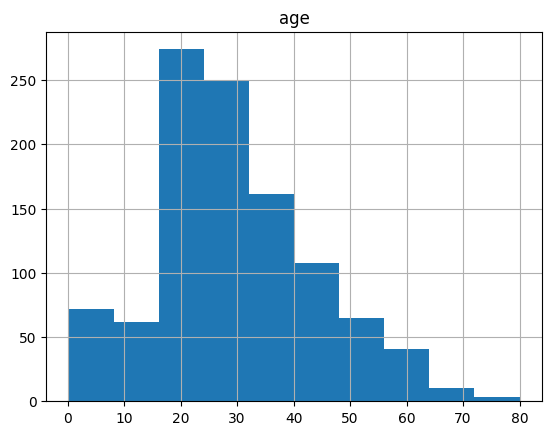

In [208]:
histogram = titanic.hist()